## focal loss with 1.1 data

#### Making directories

In [ ]:
import os, shutil


positive_directory = "positive"
negative_directory = "negative"

#creating the dataset directories
dataset_directory = "simulation_model_dataset_1.2"
try:
    os.mkdir(dataset_directory)
except FileExistsError:
    print("directory {} exists".format(dataset_directory ))


#creating the train, validation and test dataset directories
train_directory = os.path.join(dataset_directory, 'train') 
try:
    os.mkdir(train_directory)
except FileExistsError:
    print("directory {} exists".format(train_directory ))


validation_directory = os.path.join(dataset_directory, 'validation') 
try:
    os.mkdir(validation_directory)
except FileExistsError:
    print("directory {} exists".format(validation_directory ))


test_directory = os.path.join(dataset_directory, 'test')
try:
    os.mkdir(test_directory)
except FileExistsError:
    print("directory {} exists".format(test_directory ))


#positive and negative in each directory
train_positive_directory = os.path.join(train_directory, 'positive') 
try:
    os.mkdir(train_positive_directory)
except FileExistsError:
    print("directory {} exists".format(train_positive_directory ))


train_negative_directory = os.path.join(train_directory, 'negative') 
try:
    os.mkdir(train_negative_directory)
except FileExistsError:
    print("directory {} exists".format(train_negative_directory ))


validation_positive_directory = os.path.join(validation_directory, 'positive') 
try:
    os.mkdir(validation_positive_directory)
except FileExistsError:
    print("directory {} exists".format(validation_positive_directory ))


validation_negative_directory = os.path.join(validation_directory, 'negative') 

try:
    os.mkdir(validation_negative_directory)
except FileExistsError:
    print("directory {} exists".format(validation_negative_directory ))


test_positive_directory = os.path.join(test_directory, 'positive') 

try:
    os.mkdir(test_positive_directory)
except FileExistsError:
    print("directory {} exists".format(test_positive_directory ))


test_negative_directory = os.path.join(test_directory, 'negative') 
try:
    os.mkdir(test_negative_directory)
except FileExistsError:
    print("directory {} exists".format(test_negative_directory ))



#### importing data to the directories

In [ ]:
#POSITIVE DATA
if len(os.listdir(train_positive_directory)) == 0:
    positive_train_file = ['positive_{}.png'.format(i) for i in range(4000)] 
    for image in positive_train_file:
        source = os.path.join(positive_directory, image) 
        destination = os.path.join(train_positive_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(validation_positive_directory)) == 0:
    positive_validation_file = ['positive_{}.png'.format(i) for i in range(4000, 5000)] 
    for image in positive_validation_file:
        source = os.path.join(positive_directory, image) 
        destination = os.path.join(validation_positive_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(test_positive_directory)) == 0:
    positive_test_file = ['positive_{}.png'.format(i) for i in range(5000, 5160)] 
    for image in positive_test_file:
        source = os.path.join(positive_directory, image) 
        destination = os.path.join(test_positive_directory, image) 
        shutil.copyfile(source, destination)

#NEGATIVE DATA
if len(os.listdir(train_negative_directory)) == 0:
    negative_train_file = ['negative_{}.png'.format(i) for i in range(8000)] 
    for image in negative_train_file:
        source = os.path.join(negative_directory, image) 
        destination = os.path.join(train_negative_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(validation_negative_directory)) == 0:
    negative_validation_file = ['negative_{}.png'.format(i) for i in range(8000, 11000)] 
    for image in negative_validation_file:
        source = os.path.join(negative_directory, image) 
        destination = os.path.join(validation_negative_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(test_negative_directory)) == 0:
    negative_test_file = ['negative_{}.png'.format(i) for i in range(11000, 11200)] 
    for image in negative_test_file:
        source = os.path.join(negative_directory, image) 
        destination = os.path.join(test_negative_directory, image) 
        shutil.copyfile(source, destination)

     
print('total training positive images:', len(os.listdir(train_positive_directory)))
print('total training negative images:', len(os.listdir(train_negative_directory)))
print('total validation positive images:', len(os.listdir(validation_positive_directory)))
print('total validation negative images:', len(os.listdir(validation_negative_directory)))
print('total test positive images:', len(os.listdir(test_positive_directory)))
print('total test negative images:', len(os.listdir(test_negative_directory)))


total training positive images: 4000
total training negative images: 8000
total validation positive images: 1000
total validation negative images: 3000
total test positive images: 160
total test negative images: 200


#### setting class weights

In [ ]:
#setting weights
neg= 9500
pos= 3500
total= pos + neg
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.68
Weight for class 1: 1.86


#### Data degenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_rescale = ImageDataGenerator(rescale=1./255)

# train_rescale = ImageDataGenerator( rescale=1./255,
#                                     rotation_range=90, 
#                                     width_shift_range=0.2, 
#                                     height_shift_range=0.2,
#                                     brightness_range=[0.2,1.0],
#                                     shear_range=0.2,
#                                     zoom_range=0.2, 
#                                     horizontal_flip=True,)

validation_rescale = ImageDataGenerator(rescale=1./255)

#### view the image

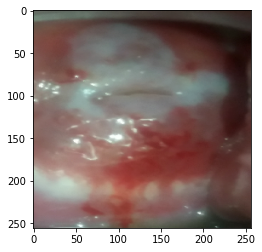

batch shape: (1, 256, 256, 3)


In [ ]:
#review one preprocessed image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.preprocessing import image
import matplotlib.pyplot as plt

positive_file = [os.path.join(train_positive_directory, data) 
          for data in os.listdir(train_positive_directory)]

path = positive_file[3]

img = image.load_img(path, target_size=(256, 256))

array_image = image.img_to_array(img)

array_image = array_image.reshape((1,) + array_image.shape)


i=0
for batch in train_rescale.flow(array_image, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
#     i += 1
#     if i % 7 == 0:
    break 
plt.show()

scaled_image = train_rescale.flow(array_image, batch_size=1)
for batch in scaled_image:
    print('batch shape:',batch.shape)
    break


#### importing data from the directories

In [ ]:
#work with all data

BATCHSIZE= 32
TRAINSIZE= len(os.listdir(train_positive_directory))+len(os.listdir(train_negative_directory))
SIZE= 256
preprocessed_train_data = train_rescale.flow_from_directory(train_directory, target_size =(SIZE, SIZE),
                                                   batch_size=BATCHSIZE, class_mode='binary')

preprocessed_validation_data = validation_rescale.flow_from_directory(validation_directory, target_size=(SIZE,SIZE),
                                                       batch_size=BATCHSIZE, class_mode='binary')

for data_batch, labels_batch in preprocessed_train_data:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break


Found 12000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
data batch shape: (32, 256, 256, 3)
label batch shape: (32,)


#### Model achitecture

In [ ]:
#creating a model
from keras import layers
from keras import models

model_3 = models.Sequential() 
model_3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(SIZE, SIZE, 3))) 
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model_3.add(layers.MaxPooling2D((2, 2))) 
model_3.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model_3.add(layers.MaxPooling2D((2, 2))) 
# model_3.add(layers.Conv2D(128, (3, 3), activation='relu')) 
# model_3.add(layers.MaxPooling2D((2, 2))) 
# model_3.add(layers.Dropout(0.5)) 
model_3.add(layers.Flatten()) 
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dropout(0.4)) 
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dropout(0.5)) 
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dropout(0.5)) 
model_3.add(layers.Dense(1, activation='sigmoid'))


model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

#### loss function, optimizer and metrics

In [ ]:
#setting loss function, optimizer and metrics
from keras import optimizers
import tensorflow as tf
import keras as ks
import tensorflow_addons as tfa

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

Mtrcs = [
      ks.metrics.TruePositives(name='tp'),
      ks.metrics.FalsePositives(name='fp'),
      ks.metrics.TrueNegatives(name='tn'),
      ks.metrics.FalseNegatives(name='fn'), 
      ks.metrics.BinaryAccuracy(name='accuracy'),
      ks.metrics.Precision(name='precision'),
      ks.metrics.Recall(name='recall'),
      ks.metrics.AUC(name='auc'),
      ks.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model_3.compile(loss=tfa.losses.SigmoidFocalCrossEntropy(), optimizer=tf.keras.optimizers.Adam(),
                metrics= Mtrcs)

# model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),
#              metrics= Mtrcs) 



#### checking the corrupted images (can be ignored)

In [ ]:
#checking the corrupted image
import os
from PIL import Image
folder_path = train_directory
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

#### fit the model

In [ ]:
#fitting the model


history = model_3.fit(preprocessed_train_data,
                      steps_per_epoch = TRAINSIZE/BATCHSIZE,
                      epochs = 15,
                      validation_data= preprocessed_validation_data)



Epoch 1/15
375/375 [==============================] - 340s 900ms/step - loss: 0.0645 - tp: 11.0000 - fp: 11.0000 - tn: 7989.0000 - fn: 3989.0000 - accuracy: 0.6667 - precision: 0.5000 - recall: 0.0027 - auc: 0.5522 - prc: 0.3673 - val_loss: 0.0569 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3000.0000 - val_fn: 1000.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_prc: 0.2500
Epoch 2/15
375/375 [==============================] - 310s 825ms/step - loss: 0.0615 - tp: 0.0000e+00 - fp: 1.0000 - tn: 7999.0000 - fn: 4000.0000 - accuracy: 0.6666 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6117 - prc: 0.4172 - val_loss: 0.0467 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3000.0000 - val_fn: 1000.0000 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8170 - val_prc: 0.5505
Epoch 3/15
375/375 [==============================] - 317s 845ms/step - loss: 0.0586 - tp: 40.0000 - fp: 1

#### Saving the model

In [ ]:
model_3.save('SAVE_model_3.h5')

#### visualisation of the model

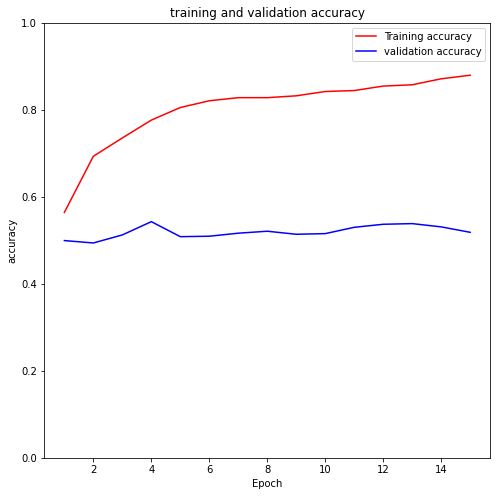

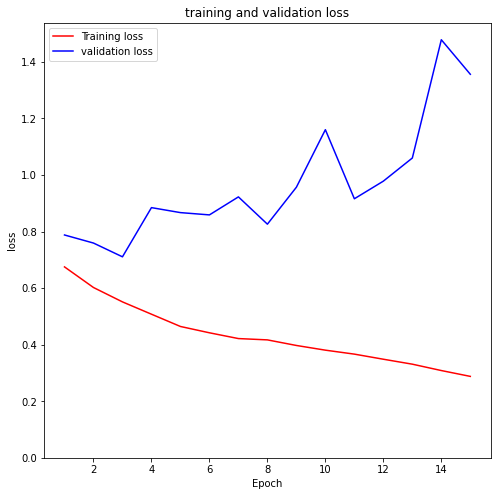

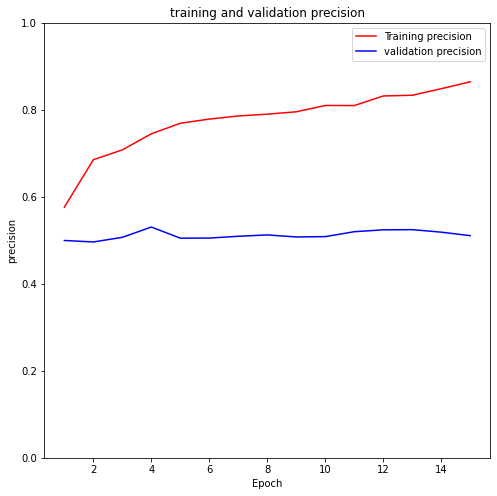

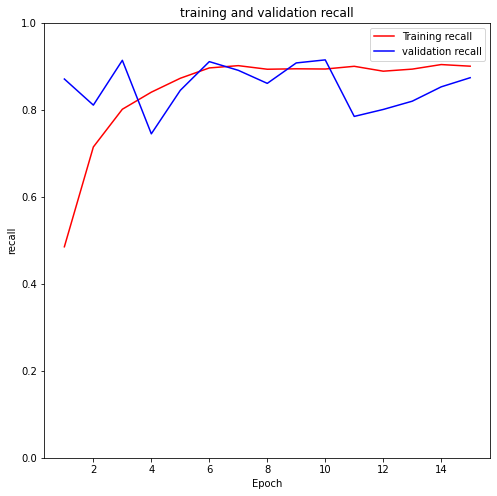

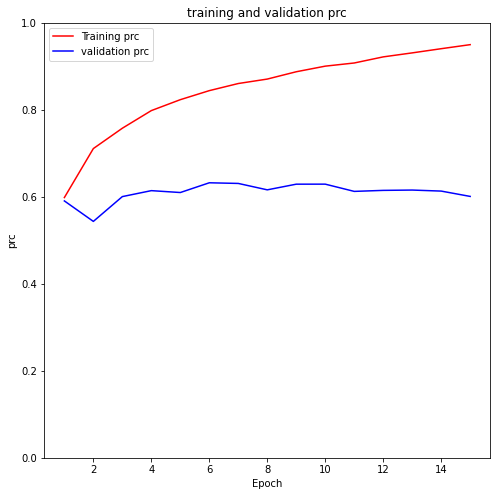

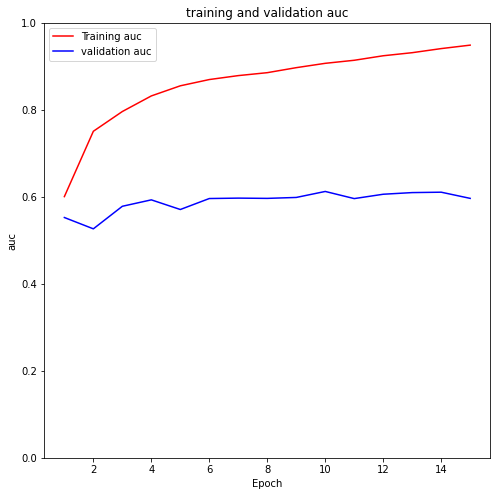

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# metric = history.history['accuracy']
# validation_accuracy = history.history['val_accuracy']
# loss = history.history['loss']
# validation_loss = history.history['val_loss']
# accuracy = history.history['accuracy']
# validation_accuracy = history.history['val_accuracy']

METRICS = ['accuracy', 'loss', 'precision', 'recall', 'prc', 'auc']

for i in METRICS:
  metric = history.history[i]
  val_metric = history.history['val_'+i]

  epochs = range(1, len(metric) + 1)
#x = range(1, 20, 4 )
#y = np.arange(0.71, 1.0)

  plt.figure(figsize=(8.0, 8.0))
  plt.plot(epochs, metric, 'r', label='Training '+i)
  plt.plot(epochs, val_metric, 'b', label = 'validation '+i)
  plt.xlabel('Epoch')
  plt.ylabel(i)
  plt.title('training and validation '+i)
  if i == 'loss':
      plt.ylim([0, plt.ylim()[1]])
  elif i == 'auc':
    plt.ylim([0,1])
  else:
    plt.ylim([0,1])
  
  plt.legend()
  plt.show()

#### specificity, NPV and PPV

In [ ]:
#specificity, NPV and PPV
TN = history.history['tn']
TP = history.history['tp']
FP = history.history['fp']
FN = history.history['fn']
TNV = history.history['val_tn']
TPV = history.history['val_tp']
FPV = history.history['val_fp']
FNV = history.history['val_fn']

print("TN = ",TN)
print("FP = ",FP)
print("TNV = ",TNV)
print("FPV = ",FPV)
print("")

# specificity =TN/(TN+FP)
#PPV = TP/(TP+FP)
#NPV = TN/(TN/FN)

spec = [ TN[x]/(TN[x] + FP[x]) for x in range (len (TN))]
val_spec = [ TNV[x]/(TNV[x] + FPV[x]) for x in range (len (TNV))]
ppv = [ TP[x]/(TP[x] + FP[x]) for x in range (len (TP))]
val_ppv= [ TPV[x]/(TPV[x] + FPV[x]) for x in range (len (TPV))]
npv = [ TN[x]/(TN[x] + FN[x]) for x in range (len (TN))]
val_npv = [ TNV[x]/(TNV[x] + FNV[x]) for x in range (len (TNV))]

print("specificity=",spec)
print("Validation specificity= ",val_spec)
print('PPV= ',ppv)
print('Validation PPV= ',val_ppv)
print("NPV= ",npv)
print('Validation NPV= ',val_npv)

#### Specificity plot

In [ ]:
#specificity plot
x = range(len(spec))

plt.figure(figsize=(8.0, 8.0))

plt.plot(x, spec, 'r', label = 'Training specificity')
plt.plot(x, val_spec, 'b', label = 'Validation specificity')
plt.xlabel('Epoch')
plt.ylabel("specificity")
plt.title('Training and validation specificity')
plt.ylim([0,1])
plt.legend()

plt.show()
